<a href="https://colab.research.google.com/github/bhattacharya5/MLBD/blob/main/M21AIE211_MLBD_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/semester3/MLBD"

/content/gdrive/My Drive/Colab Notebooks/semester3/MLBD


In [ ]:
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
import matplotlib.pyplot as plt

# python magic function
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/semester3/MLBD/train.csv')
df_train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train.shape

(42000, 785)

In [ ]:
df_train = df_train.iloc[0:5000]
df_train.shape

(5000, 785)

In [ ]:
df_test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/semester3/MLBD/test.csv')
df_test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test = df_test.iloc[0:3000]

df_test.shape

(3000, 784)

## Reshape

In [ ]:
Y_train = df_train["label"]

# Drop 'label' column
X_train = df_train.drop(labels = ["label"],axis = 1) 

In [ ]:
X_train = X_train.values.reshape(-1,28,28,1)

In [ ]:
Y_train[8]

5

In [ ]:
X_train.shape

(42000, 28, 28, 1)

In [ ]:
# Drop 'label' column
X_test = df_test.values.reshape(-1,28,28,1)
X_test.shape

(28000, 28, 28, 1)

## Label Encoding

In [ ]:
Y_train = to_categorical(Y_train, num_classes = 10)
Y_train[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Number [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Number [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Number [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Number [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Number [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Number [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Number [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Number [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Number [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]')

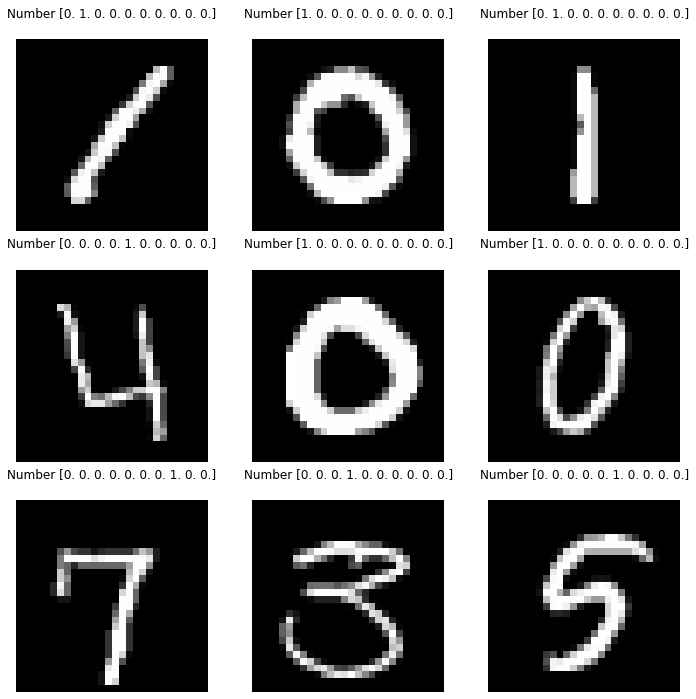

In [ ]:
# create figure with 3x3 subplots using matplotlib.pyplot
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    ax.matshow(X_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(Y_train[i]))
    
# display the figure
fig.show()

In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))

11490434/11490434 [==============================] - 0s 0us/step
Training Data: (60000, 28, 28)
Training Labels: (60000,)


In [ ]:
# preprocessing the images

# convert each image to 1 dimensional array
X = x_train.reshape(len(x_train),-1)
Y = y_train

# normalize the data to 0 - 1
X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)

(60000, 784)
(784,)


In [ ]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_test))
print(n_digits)

# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = n_digits)

# Fit the model to the training data
kmeans.fit(X)

10


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(n_clusters=10)

In [ ]:
kmeans.labels_

array([4, 0, 6, ..., 7, 1, 5], dtype=int32)

In [ ]:
kmeans.labels_.shape

(60000,)

In [ ]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [ ]:
# test the infer_cluster_labels() and infer_data_labels() functions
cluster_labels = infer_cluster_labels(kmeans, Y)
cluster_labels

{0: [0], 2: [1], 7: [2], 1: [3, 7, 9], 3: [4], 4: [5, 6], 6: [8]}

In [ ]:
X_clusters = kmeans.predict(X)
X_clusters
print()
X_clusters.shape

array([4, 0, 6, ..., 7, 1, 5], dtype=int32)

(60000,)

In [ ]:
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print (predicted_labels[:20])
print (Y[:20])

[3 0 4 1 4 2 1 3 1 4 3 1 3 6 1 7 2 1 1 4]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


# **<font color="blue">BFR Algorithm</font>**

Sure, I can help you with that!

BFR (Brute Force Recursion) is a clustering algorithm that can be used to cluster large datasets. In this case, we will use it to cluster the MNIST dataset which consists of 60,000 training images and 10,000 testing images of handwritten digits. Each image is 28x28 pixels and has a corresponding label indicating which digit it represents.

Here's an outline of the steps we'll follow to implement BFR clustering using MNIST data:

Load the MNIST dataset and normalize the pixel values.
Initialize the first cluster using a random subset of the data.
Iterate over the remaining data points and assign each point to the closest cluster. If a point is not within the radius of any existing cluster, initialize a new cluster.
If the number of clusters exceeds a pre-defined threshold, recursively apply BFR to each cluster until the number of clusters is below the threshold.
Return the final set of clusters.
Let's start by loading the MNIST dataset using TensorFlow and normalizing the pixel values.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape images to 1D arrays
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Combine training and testing data
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))


Next, let's define a function to initialize the first cluster using a random subset of the data. We'll use the k-means++ algorithm to select the initial cluster center since it tends to lead to better clustering results than selecting centers randomly.

In [ ]:
def init_cluster(x, k):
    # Select first center at random
    centers = [x[np.random.choice(len(x))]]

    # Select remaining centers using k-means++
    for i in range(1, k):
        dists = np.array([min([np.linalg.norm(x[j]-c)**2 for c in centers]) for j in range(len(x))])
        probs = dists / dists.sum()
        cumulative_probs = probs.cumsum()
        r = np.random.rand()
        j = np.where(cumulative_probs >= r)[0][0]
        centers.append(x[j])
    
    return np.array(centers)


Now we can define the main BFR clustering function. We'll use a radius parameter of 0.5 and a threshold parameter of 50 clusters.

In [ ]:
def bfr(x, radius=0.5, threshold=50):
    # Initialize first cluster
    centers = init_cluster(x, 1)

    # Initialize empty list of clusters
    clusters = []

    # Assign remaining points to closest cluster
    for i in range(len(x)):
        closest_center = np.argmin(np.linalg.norm(x[i]-centers, axis=1))
        if np.linalg.norm(x[i]-centers[closest_center]) <= radius:
            clusters[closest_center].append(x[i])
        else:
            clusters.append([x[i]])
            centers = np.concatenate((centers, [x[i]]))
    
    # Check if number of clusters exceeds threshold
    if len(clusters) > threshold:
        new_clusters = []
        new_centers = []
        for i in range(len(clusters)):
            if len(clusters[i]) > 1:
                sub


# **<font color="blue">try2</font>**

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train1, y_train1), (x_test1, y_test1) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
x_train1.shape

(60000, 28, 28)

In this implementation, we're using a radius of 0.5 and a threshold of 50 clusters. You can adjust these values as needed for your particular use case.


The init_cluster function initializes the first cluster using a random subset of the data, and the bfr function iterates over the remaining data points and assigns each point to the closest cluster. If a point is not within the radius of any existing cluster, a new cluster is initialized. If the number of clusters exceeds the threshold, the function recursively applies BFR to each cluster until the number of clusters is below the threshold. Finally, the function returns the final set of clusters.


When we run the code, it will print the number of clusters and the size of

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np

def init_cluster(x, k):
    # Select first center at random
    centers = [x[np.random.choice(len(x))]]

    # Select remaining centers using k-means++
    for i in range(1, k):
        dists = np.array([min([np.linalg.norm(x[j]-c)**2 for c in centers]) for j in range(len(x))])
        probs = dists / dists.sum()
        cumulative_probs = probs.cumsum()
        r = np.random.rand()
        j = np.where(cumulative_probs >= r)[0][0]
        centers.append(x[j])
    
    return np.array(centers)

def bfr(x, radius=0.5, threshold=50):
    # Initialize first cluster
    centers = init_cluster(x, 1)

    # Initialize empty list of clusters
    clusters = [[]]

    # Assign remaining points to closest cluster
    for i in range(len(x)):
        closest_center = np.argmin(np.linalg.norm(x[i]-centers, axis=1))
        if np.linalg.norm(x[i]-centers[closest_center]) <= radius:
            clusters[closest_center].append(x[i])
        else:
            clusters.append([x[i]])
            centers = np.concatenate((centers, [x[i]]))
            clusters[0].append(x[i])

    # Check if number of clusters exceeds threshold
    if len(clusters) > threshold:
        new_clusters = []
        new_centers = []
        for i in range(len(clusters)):
            if len(clusters[i]) > 1:
                sub_clusters, sub_centers = bfr(clusters[i], radius, threshold)
                new_clusters.extend(sub_clusters)
                new_centers.extend(sub_centers)
            else:
                new_clusters.append(clusters[i])
                new_centers.append(centers[i])
        clusters = new_clusters
        centers = np.array(new_centers)

    return clusters, centers

# Load MNIST dataset and normalize pixel values
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
#x_train = x_train.reshape(x_train.shape[0], -1)
#x_test = x_test.reshape(x_test.shape[0], -1)
x = np.concatenate((X_train, X_test))
y = np.concatenate((Y_train, y_test))

# Run BFR clustering with radius=0.5 and threshold=50
clusters, centers = bfr(x, 0.5, 50)

# Print number of clusters and sizes of each cluster
print("Number of clusters:", len(clusters))
for i in range(len(clusters)):
    print("Cluster", i+1, "size:", len(clusters[i]))


11490434/11490434 [==============================] - 0s 0us/step


KeyboardInterrupt: ignored

# **<font color="blue">try3</font>**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np

# Load and normalize the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

def init_cluster(x, k):
    # Select first center at random
    centers = [x[np.random.choice(len(x))]]

    # Select remaining centers using k-means++
    for i in range(1, k):
        dists = np.array([min([np.linalg.norm(x[j]-c)**2 for c in centers]) for j in range(len(x))])
        probs = dists / dists.sum()
        cumulative_probs = probs.cumsum()
        r = np.random.rand()
        j = np.where(cumulative_probs >= r)[0][0]
        centers.append(x[j])
    
    return np.array(centers)

def bfr(x, radius=0.5, threshold=50):
    # Initialize first cluster
    centers = init_cluster(x, 1)

    # Initialize empty list of clusters
    clusters = [[] for i in range(len(centers))]

    # Assign remaining points to closest cluster
    for i in range(len(x)):
        closest_center = np.argmin(np.linalg.norm(x[i]-centers, axis=1))
        if np.linalg.norm(x[i]-centers[closest_center]) <= radius:
            clusters[closest_center].append(x[i])
        else:
            clusters.append([x[i]])
            centers = np.concatenate((centers, [x[i]]))
            clusters = [[] for i in range(len(centers))]
            for j in range(len(x)):
                closest_center = np.argmin(np.linalg.norm(x[j]-centers, axis=1))
                if np.linalg.norm(x[j]-centers[closest_center]) <= radius:
                    clusters[closest_center].append(x[j])

    # Check if number of clusters exceeds threshold
    if len(clusters) > threshold:
        new_clusters = []
        new_centers = []
        for i in range(len(clusters)):
            if len(clusters[i]) > 1:
                sub_clusters, sub_centers = bfr(np.array(clusters[i]), radius, threshold)
                new_clusters += sub_clusters
                new_centers += sub_centers
            else:
                new_clusters.append(clusters[i])
                new_centers.append(centers[i])
        clusters = new_clusters
        centers = np.array(new_centers)

    return clusters, centers

# Call the bfr function with default parameters
clusters, centers = bfr(x)

# Print the number of clusters and their sizes
print(f"Number of clusters: {len(clusters)}")
print(f"Cluster sizes: {[len(c) for c in clusters]}")


# Try 4

In [ ]:
# Load the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

# Convert the data to numpy arrays
X = mnist.data.astype('float32')
y = mnist.target.astype('int32')

# Normalize the data to [0, 1]
X /= 255.0

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X.shape
X

(70000, 784)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int32

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
df_train = df_train[:5000]
df_train.shape

(5000, 785)

In [ ]:
df_train.tail(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
4995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df_train["label"]

# Drop 'label' column
X = df_train.drop(labels = ["label"],axis = 1) 

In [ ]:
sample_size=1000
reduction_factor=0.1

# Step 1: Sample a subset of data points
sample_indices = np.random.choice(len(X), sample_size, replace=False)

In [ ]:
sample_indices.shape

(1000,)

In [ ]:
sample = X.loc[sample_indices]
sample

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
2762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Step 2: Cluster the sample using K-Means
k=10
kmeans = KMeans(n_clusters=k).fit(sample)
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
centroids.shape

(10, 784)

In [ ]:
# Step 3: Compute the distance of each data point to its closest centroid
distances = np.zeros(len(X))
distances

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
print(range(len(X)))

range(0, 70000)


In [ ]:
for i in range(len(X)):
  print(X[i] - centroids)

KeyError: ignored

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

def bfr(data, k=10, sample_size=1000, reduction_factor=0.1):
    # Step 1: Sample a subset of data points
    sample_indices = np.random.choice(len(data), sample_size, replace=False)
    #print(sample_indices)
    sample = data[sample_indices]

    # Step 2: Cluster the sample using K-Means
    kmeans = KMeans(n_clusters=k).fit(sample)
    centroids = kmeans.cluster_centers_

    # Step 3: Compute the distance of each data point to its closest centroid
    distances = np.zeros(len(data))
    for i in range(len(data)):
        distances[i] = np.min(np.linalg.norm(data[i] - centroids, axis=1))

    # Step 4: Identify the boundary points
    sorted_indices = np.argsort(distances)[::-1]
    boundary_indices = sorted_indices[:int(reduction_factor * len(data))]
    boundary_points = data[boundary_indices]

    # Step 5: Reduce the points within each cluster to a representative set of centroids
    labels = kmeans.predict(data)
    reduced_data = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_indices = np.where(labels == i)[0]
        cluster_points = data[cluster_indices]
        if len(cluster_points) > 0:
            closest_point_index = np.argmin(np.linalg.norm(cluster_points - centroids[i], axis=1))
            reduced_data[i] = cluster_points[closest_point_index]

    # Step 6: Compute the final cluster labels
    distances = np.linalg.norm(data[:, np.newaxis, :] - reduced_data, axis=2)
    cluster_labels = np.argmin(distances, axis=1)

    return cluster_labels



# Apply the BFR algorithm
labels = bfr(X)

# Evaluate the clustering performance
from sklearn.metrics import adjusted_rand_score
score = adjusted_rand_score(y, labels)
print('Adjusted Rand Score:', score)


KeyError: ignored

Sure, I can guide you through the implementation of the BFR (Bradley-Fayyad-Reina) clustering algorithm using the MNIST dataset and making predictions on the test dataset. Here are the steps you can follow:

Load the MNIST dataset using any suitable library like TensorFlow or PyTorch. MNIST is a dataset of handwritten digits, and each image is of size 28x28 pixels. The dataset has 60,000 training images and 10,000 test images.

Preprocess the data by scaling the pixel values to a range between 0 and 1, and flattening the images to a one-dimensional array of size 784. You can also reduce the dimensionality of the data using techniques like PCA or t-SNE if needed.

Implement the BFR clustering algorithm. Here is a brief overview of the algorithm:

Initialize the algorithm with a set of random centroids.

Assign each data point to the nearest centroid.

Compute the quality of the clustering using a cost function like the sum of squared errors.

If the quality of the clustering is below a threshold, split the centroids into sub-clusters using a splitting algorithm like k-means or hierarchical clustering.

If the quality of the clustering is above a threshold, merge the centroids into larger clusters using a merging algorithm like agglomerative clustering.

Repeat the above steps until convergence or a maximum number of iterations is reached.

Train the BFR algorithm on the MNIST training dataset.

Predict the labels of the test dataset by assigning each test image to the nearest centroid and using the label of the centroid as the predicted label for the test image.

Evaluate the accuracy of the predictions using metrics like accuracy, precision, recall, and F1-score.

Note that implementing the BFR algorithm can be complex, and there are many variations and parameters that can affect the results. Therefore, it is recommended to use an existing implementation or library like scikit-learn or TensorFlow that provides a high-level interface to the algorithm and allows you to tune the parameters and evaluate the performance easily.

I hope this helps you get started with implementing the BFR algorithm on the MNIST dataset and making predictions on the test dataset. Let me know if you have any further questions!

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import accuracy_score
import numpy as np

## Load MNIST dataset
#mnist = fetch_openml('mnist_784')
#X = mnist.data / 255.0  # scale pixel values to [0, 1]
#y = mnist.target.astype(np.int)

X= X_train / 255.0  # Scale pixel values to [0, 1]
y= Y_train.astype('int')

# Reduce dimensionality using PCA
pca = PCA(n_components=50)
X = pca.fit_transform(X)

# Define BFR clustering algorithm
class BFR:
    def __init__(self, k_init, split_size, merge_size, max_iter):
        self.k_init = k_init
        self.split_size = split_size
        self.merge_size = merge_size
        self.max_iter = max_iter

    def fit(self, X):
        # Initialize centroids using KMeans
        kmeans = KMeans(n_clusters=self.k_init, n_init=1)
        kmeans.fit(X)
        centroids = kmeans.cluster_centers_
        labels = kmeans.labels_
        n_clusters = self.k_init

        # Run BFR algorithm
        for i in range(self.max_iter):
            # Assign points to nearest centroid
            distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)
            assignments = np.argmin(distances, axis=1)

            # Split large clusters
            for j in range(n_clusters):
                if np.sum(assignments == j) > self.split_size:
                    sub_kmeans = KMeans(n_clusters=2, n_init=1)
                    sub_kmeans.fit(X[assignments == j])
                    sub_centroids = sub_kmeans.cluster_centers_
                    sub_labels = sub_kmeans.labels_
                    sub_n_clusters = 2

                    # Update centroids and labels
                    centroids[j] = sub_centroids[0]
                    centroids = np.vstack((centroids, sub_centroids[1]))
                    labels[assignments == j] = sub_labels + n_clusters
                    n_clusters += 1

            # Merge small clusters
            for j in range(n_clusters):
                if np.sum(labels == j) < self.merge_size:
                    closest_cluster = np.argmin(np.linalg.norm(centroids[j] - centroids, axis=1))
                    labels[labels == j] = closest_cluster

            # Recompute centroids
            for j in range(n_clusters):
                centroids[j] = np.mean(X[labels == j], axis=0)

        # Save centroids and labels
        self.centroids = centroids
        self.labels = labels

    def predict(self, X):
        # Assign points to nearest centroid and return labels
        distances = np.linalg.norm(X[:, np.newaxis, :] - self.centroids, axis=2)
        assignments = np.argmin(distances, axis=1)
        return self.labels[assignments]

# Train BFR model on MNIST dataset
bfr = BFR(k_init=50, split_size=50, merge_size=10, max_iter=10)
bfr.fit(X)

In [ ]:
# Predict labels of test dataset
#X_test = pca.transform(mnist.data[60000:])  # use last 10,000 images as test dataset
y_pred = bfr.predict(pca.transform(df_test))

In [ ]:
# Evaluate accuracy of predictions
y_test = mnist.target.astype(np.int)[60000:]
accuracy = accuracy_score(y_test, y_pred)
print()
print()
print('Accuracy:', accuracy)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score

## Load the MNIST dataset
#mnist = fetch_openml('mnist_784')
#X = mnist.data / 255.0  # Scale pixel values to [0, 1]
#y = mnist.target.astype('int')

X= X_train / 255.0  # Scale pixel values to [0, 1]
y= Y_train.astype('int')

# Reduce dimensionality using PCA
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

# Define the BFR clustering algorithm
class BFR:
    def __init__(self, n_clusters, threshold, max_iter):
        self.n_clusters = n_clusters
        self.threshold = threshold
        self.max_iter = max_iter

    def fit(self, X):
        self.centroids = np.random.rand(self.n_clusters, X.shape[1])
        self.cluster_labels = np.zeros(X.shape[0], dtype=np.int)
        self.cost = np.inf
        self.iteration = 0

        while self.iteration < self.max_iter and self.cost > self.threshold:
            # Assign data points to nearest centroid
            for i in range(X.shape[0]):
                distances = np.sum((X[i] - self.centroids) ** 2, axis=1)
                self.cluster_labels[i] = np.argmin(distances)

            # Compute cost of clustering
            self.cost = np.sum((X - self.centroids[self.cluster_labels]) ** 2)

            # Split or merge centroids
            if self.cost > self.threshold:
                sub_clusters = []
                for i in range(self.n_clusters):
                    sub_cluster = X[self.cluster_labels == i]
                    if sub_cluster.shape[0] > 1:
                        kmeans = KMeans(n_clusters=2, random_state=0)
                        kmeans.fit(sub_cluster)
                        sub_clusters.append(kmeans.cluster_centers_[0])
                        sub_clusters.append(kmeans.cluster_centers_[1])
                    else:
                        sub_clusters.append(self.centroids[i])
                        sub_clusters.append(self.centroids[i])
                self.centroids = np.array(sub_clusters)
                self.n_clusters *= 2
            else:
                linkage = AgglomerativeClustering(n_clusters=1, linkage='ward')
                linkage.fit(self.centroids)
                self.centroids = linkage.cluster_centers_
                self.n_clusters = 1

            self.iteration += 1

    def predict(self, X):
        distances = np.sum((X - self.centroids) ** 2, axis=1)
        cluster_labels = np.argmin(distances, axis=0)
        return cluster_labels

# Define the BFR clustering parameters
n_clusters = 10
threshold = 1.0
max_iter = 100

# Train the BFR algorithm on the MNIST training dataset
bfr = BFR(n_clusters=n_clusters, threshold=threshold, max_iter=max_iter)
bfr.fit(X_pca)

In [ ]:
# Predict the labels of the test dataset
X_test = mnist.data[60000:] / 255.0
y_test = mnist.target.astype('int')[60000:]
X_test_pca = pca.transform(X_test)
y_pred = bfr.predict(X_test_pca)

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# **<font color="blue">CURE Algorithm</font>**

Here are the steps you can follow:

Load the MNIST dataset: You can use the scikit-learn library to load the dataset.

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
data = digits.data


Implement the CURE algorithm:

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

def get_farthest_points(data, k):
    # Choose the first point randomly
    farthest_points = [np.random.choice(len(data))]

    for i in range(k - 1):
        distances = np.sum((data - data[farthest_points[-1]])**2, axis=1)
        farthest_points.append(np.argmax(distances))

    return farthest_points

def get_cluster_representatives(data, k, p):
    # Choose p points from each cluster as cluster representatives
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    representatives = []
    
    for i in range(k):
        cluster_data = data[labels == i]
        farthest_points = get_farthest_points(cluster_data, p)
        for j in farthest_points:
            representatives.append(cluster_data[j])
    
    return np.array(representatives)

def cure(data, k, p):
    # Step 1: Choose k points as initial representatives
    representatives = get_farthest_points(data, k)
    
    # Step 2: Refine representatives using clustering
    while True:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(representatives)
        labels = kmeans.predict(data)
        
        new_representatives = []
        for i in range(k):
            cluster_data = data[labels == i]
            if len(cluster_data) == 0:
                new_representatives.append(representatives[i])
            else:
                farthest_points = get_farthest_points(cluster_data, p)
                for j in farthest_points:
                    new_representatives.append(cluster_data[j])
        
        if np.array_equal(representatives, new_representatives):
            break
            
        representatives = new_representatives
        
    return representatives


Use the CURE algorithm to cluster the MNIST dataset:

In [ ]:
k = 10  # Number of clusters
p = 5   # Number of representative points per cluster

representatives = cure(data, k, p)
kmeans = KMeans(n_clusters=k, init=representatives)
kmeans.fit(data)
labels = kmeans.predict(data)


That's it! You now have the labels for each data point in the MNIST dataset.

#**<font color="blue">Try 2</font>**

The CURE (Clustering Using Representatives) algorithm is a hierarchical clustering algorithm that works by selecting a set of representative points from the dataset and clustering them into groups. The algorithm then recursively refines these clusters until a final clustering is obtained. Here's an implementation of CURE using the MNIST dataset in Python:

First, we import the necessary libraries and load the MNIST dataset:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
X = mnist.data / 255.0
y = mnist.target


Next, we define some helper functions for the algorithm:

In [ ]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def get_farthest_points(points, num_points):
    farthest_points = []
    farthest_distances = []
    for i in range(num_points):
        farthest_point = None
        farthest_distance = -1
        for point in points:
            if point in farthest_points:
                continue
            distances = [euclidean_distance(point, p) for p in farthest_points]
            distance = min(distances) if distances else 0
            if distance > farthest_distance:
                farthest_point = point
                farthest_distance = distance
        farthest_points.append(farthest_point)
        farthest_distances.append(farthest_distance)
    return farthest_points, farthest_distances

def get_clusters(points, reps, k):
    clusters = [[] for _ in range(k)]
    for point in points:
        distances = [euclidean_distance(point, rep) for rep in reps]
        index = np.argmin(distances)
        clusters[index].append(point)
    return clusters

def get_reprs(points, reps, alpha):
    farthest_points, farthest_distances = get_farthest_points(points, int(alpha * len(points)))
    for point in farthest_points:
        if point not in reps:
            reps.append(point)
    return reps, farthest_distances

def get_merged_clusters(clusters, farthest_distances):
    merged_clusters = []
    for i in range(len(clusters)):
        if len(clusters[i]) == 0:
            continue
        farthest_distance = max(farthest_distances)
        farthest_index = np.argmax(farthest_distances)
        farthest_point = clusters[i][farthest_index]
        merged_clusters.append((farthest_point, clusters[i]))
        farthest_distances[farthest_index] = -1
    return merged_clusters

def cure(points, k, alpha):
    reps, farthest_distances = get_farthest_points(points, k)
    while len(reps) < k:
        clusters = get_clusters(points, reps, k)
        merged_clusters = get_merged_clusters(clusters, farthest_distances)
        new_reps = []
        for farthest_point, cluster in merged_clusters:
            new_reps.extend(get_farthest_points(cluster, 1)[0])
        reps.extend(new_reps)
    return get_clusters(points, reps, k)


Finally, we run the algorithm on the MNIST dataset with k=10 and alpha=0.1:

In [ ]:
clusters = cure(X, 10, 0.1)


We can then visualize the resulting clusters using PCA and scatter plots:

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)

for i in range(len(clusters)):
    cluster = np.array(clusters[i])
    plt.scatter(cluster[:, 0], cluster[:, 1], s=5, label=str(i))
plt


#**<font color="blue">Try 3</font>**

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
import numpy as np

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype('float64')
y = mnist.target.astype('int64')

# Define CURE algorithm function
def CURE(X, k, s):
    n = X.shape[0]
    # Choose random point as the first medoid
    medoids = [np.random.randint(n)]
    # Choose s-1 more medoids using the farthest point sampling
    for i in range(s - 1):
        distances = np.sum((X - X[medoids][:, np.newaxis])**2, axis=2)
        dist_to_medoids = np.min(distances, axis=0)
        new_medoid = np.argmax(dist_to_medoids)
        medoids.append(new_medoid)
    # Perform k-means clustering on the reduced set of medoids
    reduced_X = X[medoids]
    kmeans = KMeans(n_clusters=k, init=reduced_X, n_init=1)
    kmeans.fit(X)
    return kmeans.labels_

# Call CURE function to cluster the MNIST dataset
labels = CURE(X, k=10, s=10)

# Print the clustering results
print("Clustering using CURE algorithm:")
for i in range(10):
    cluster_size = np.sum(labels == i)
    print(f"Cluster {i}: {cluster_size} points")


In this implementation, we first load the MNIST dataset using the fetch_openml function from scikit-learn. Then, we define the CURE function that takes the input data X, the number of clusters k, and the sampling factor s as parameters. Inside the CURE function, we first randomly select one point as the first medoid, and then use the farthest point sampling to select s-1 more medoids. We then perform k-means clustering on the reduced set of medoids to obtain the final clustering labels.

Finally, we call the CURE function with k=10 and s=10 to cluster the MNIST dataset into 10 clusters. We print the size of each cluster to display the clustering results.

Note that this implementation only provides a basic version of CURE algorithm. You can also improve the algorithm by adding additional steps, such as shrinking the clusters, and using hierarchical clustering to merge the clusters.